In [4822]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4823]:
# function to replace semicolon with comma
def semicolon_to_comma(name):

    reading_file = open(name + ".csv", "r")
    new_file_content = ""
    for line in reading_file:
        stripped_line = line.strip()
        new_line = stripped_line.replace(";", ",")
        new_file_content += new_line +"\n"
    reading_file.close()
    writing_file = open(name + ".csv", "w")
    writing_file.write(new_file_content)
    writing_file.close()

In [4824]:
file_name = 'clinical_dataset'
semicolon_to_comma(file_name)

In [4825]:
# create a dataframe for the clinical_dataset
clinical = pd.read_csv(file_name + '.csv')
print(clinical.dtypes)

part_id                              int64
fried                               object
gender                              object
age                                  int64
hospitalization_one_year             int64
hospitalization_three_years          int64
ortho_hypotension                   object
vision                              object
audition                            object
weight_loss                         object
exhaustion_score                     int64
raise_chair_time                   float64
balance_single                      object
gait_get_up                        float64
gait_speed_4m                      float64
gait_optional_binary                  bool
gait_speed_slower                   object
grip_strength_abnormal              object
low_physical_activity               object
falls_one_year                       int64
fractures_three_years                int64
bmi_score                          float64
bmi_body_fat                       float64
waist      

In [4826]:
# create maps to replace Yes/No and True/False values with 1/0
yn_map = {'Yes': 1, 'No': 0}
tf_map = {True: 1, False: 0}

In [4827]:
# fried has no NaN or error values
clinical['fried'].value_counts(dropna=False)

Pre-frail    227
Non frail    213
Frail        100
Name: fried, dtype: int64

In [4828]:
# nominal categories converted to numerical
fried_map = {'Frail': 2, 'Pre-frail': 1, 'Non frail': 0}
clinical['fried'] = clinical['fried'].map(fried_map)
clinical['fried'].value_counts(dropna=False)

1    227
0    213
2    100
Name: fried, dtype: int64

In [4829]:
# gender has no NaN or error values
clinical['gender'].value_counts(dropna=False)

F    328
M    212
Name: gender, dtype: int64

In [4830]:
# gender F/M converted to 1/0 respectively
gender_map = {'F': 1, 'M': 0}
clinical['gender'] = clinical['gender'].map(gender_map)
clinical['gender'].value_counts(dropna=False)

1    328
0    212
Name: gender, dtype: int64

In [4831]:
# age has no NaN/error values and no categories
clinical['age'].value_counts(dropna=False)

70    67
71    44
76    38
75    34
72    34
73    34
78    32
77    30
80    29
79    27
74    22
83    20
82    20
84    15
81    15
85    14
87    12
86    11
69    10
90     9
91     8
92     5
89     4
88     3
95     1
93     1
68     1
Name: age, dtype: int64

In [4832]:
# hospitalization has no NaN/error values
clinical['hospitalization_one_year'].value_counts(dropna=False)

0     445
1      79
2       8
3       3
6       2
10      1
15      1
14      1
Name: hospitalization_one_year, dtype: int64

In [4833]:
#hospitalization three years has 2 error values
clinical['hospitalization_three_years'].value_counts(dropna=False)

0      351
1      137
2       26
3       10
4        6
999      2
5        2
8        2
11       1
10       1
30       1
14       1
Name: hospitalization_three_years, dtype: int64

In [4834]:
# hypotention has no error/NaN values
clinical['ortho_hypotension'].value_counts(dropna=False)

No     470
Yes     70
Name: ortho_hypotension, dtype: int64

In [4835]:
# Yes/No converted to 1/0 respectively
clinical['ortho_hypotension'] = clinical['ortho_hypotension'].map(yn_map)
clinical['ortho_hypotension'].value_counts(dropna=False)

/Users/shortie/opt/anaconda3/envs/data_analysis/lib/python3.9/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


0    470
1     70
Name: ortho_hypotension, dtype: int64

In [4836]:
# vision has no NaN/error values
clinical['vision'].value_counts(dropna=False)

Sees well          364
Sees moderately    152
Sees poorly         24
Name: vision, dtype: int64

In [4837]:
# nominal categories converted to numerical
vision_map = {'Sees well': 2, 'Sees moderately': 1, 'Sees poorly': 0}
clinical['vision'] = clinical['vision'].map(vision_map)
clinical['vision'].value_counts(dropna=False)

2    364
1    152
0     24
Name: vision, dtype: int64

In [4838]:
# audition has no NaN/error values
clinical['audition'].value_counts(dropna=False)

Hears well          393
Hears moderately    118
Hears poorly         29
Name: audition, dtype: int64

In [4839]:
# nominal categories converted to numerical
audition_map = {'Hears well': 2, 'Hears moderately': 1, 'Hears poorly': 0}
clinical['audition'] = clinical['audition'].map(audition_map)
clinical['audition'].value_counts(dropna=False)

2    393
1    118
0     29
Name: audition, dtype: int64

In [4840]:
# 2NaN values
clinical['weight_loss'].value_counts(dropna=False)

No     494
Yes     44
NaN      2
Name: weight_loss, dtype: int64

/Users/shortie/opt/anaconda3/envs/data_analysis/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weight_loss', ylabel='Density'>

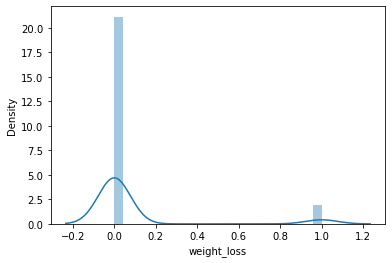

In [4841]:
# Yes/No values converted to 1/0 respectively
clinical['weight_loss'] = clinical['weight_loss'].map(yn_map)
clinical['weight_loss'].value_counts(dropna=False)
sns.distplot(clinical.weight_loss)

In [4842]:
# exhaustion score has no NaN/error values
clinical['exhaustion_score'].value_counts(dropna=False)

1    420
2    120
Name: exhaustion_score, dtype: int64

In [4843]:
# 44x 999
clinical['raise_chair_time'].value_counts(dropna=False)

999.00    44
14.00     32
12.00     19
13.00     17
10.00     16
          ..
8.90       1
10.51      1
14.72      1
15.80      1
6.60       1
Name: raise_chair_time, Length: 278, dtype: int64

In [4844]:
# 49x error and 1 NaN
clinical['balance_single'].value_counts(dropna=False)

>5 sec                 333
<5 sec                 157
test non realizable     49
NaN                      1
Name: balance_single, dtype: int64

In [4845]:
# nominal categories converted to numerical
bs_map = {'>5 sec': 1, '<5 sec': 0}
clinical['balance_single'] = clinical['balance_single'].map(bs_map)
clinical['balance_single'].value_counts(dropna=False)

1.0    333
0.0    157
NaN     50
Name: balance_single, dtype: int64

In [4846]:
# no NaN/error values
clinical['gait_get_up'].value_counts(dropna=False)

10.00    22
7.00     22
6.00     20
8.00     19
9.00     16
         ..
9.64      1
9.53      1
7.63      1
34.00     1
5.70      1
Name: gait_get_up, Length: 245, dtype: int64

In [4847]:
# no NaN/error values
clinical['gait_speed_4m'].value_counts(dropna=False)

5.00     41
7.00     23
6.00     21
4.00     19
2.70     10
         ..
0.00      1
4.80      1
30.00     1
3.55      1
2.85      1
Name: gait_speed_4m, Length: 222, dtype: int64

In [4848]:
# no NaN/error values
clinical['gait_optional_binary'].value_counts(dropna=False)

False    493
True      47
Name: gait_optional_binary, dtype: int64

In [4849]:
# convert True/False to 1/0 respectively
clinical['gait_optional_binary'] = clinical['gait_optional_binary'].map(tf_map)
clinical['gait_optional_binary'].value_counts(dropna=False)

0    493
1     47
Name: gait_optional_binary, dtype: int64

In [4850]:
#4 errors
clinical['gait_speed_slower'].value_counts(dropna=False)

No                   387
Yes                  149
Test not adequate      4
Name: gait_speed_slower, dtype: int64

In [4851]:
clinical['gait_speed_slower'] = clinical['gait_speed_slower'].map(yn_map)
clinical['gait_speed_slower'].value_counts(dropna=False)

0.0    387
1.0    149
NaN      4
Name: gait_speed_slower, dtype: int64

In [4852]:
clinical['grip_strength_abnormal'].value_counts(dropna=False)

No     300
Yes    240
Name: grip_strength_abnormal, dtype: int64

In [4853]:
clinical['grip_strength_abnormal'] = clinical['grip_strength_abnormal'].map(yn_map)
clinical['grip_strength_abnormal'].value_counts(dropna=False)

0    300
1    240
Name: grip_strength_abnormal, dtype: int64

In [4854]:
clinical['low_physical_activity'].value_counts(dropna=False)

No     452
Yes     88
Name: low_physical_activity, dtype: int64

In [4855]:
clinical['low_physical_activity'] = clinical['low_physical_activity'].map(yn_map)
clinical['low_physical_activity'].value_counts(dropna=False)

0    452
1     88
Name: low_physical_activity, dtype: int64

In [4856]:
# 3x 999
clinical['falls_one_year'].value_counts(dropna=False)

0      389
1       98
2       31
3       11
999      3
5        3
4        3
6        1
40       1
Name: falls_one_year, dtype: int64

In [4857]:
#1x 999
clinical['fractures_three_years'].value_counts(dropna=False)

0      451
1       77
2        8
3        2
4        1
999      1
Name: fractures_three_years, dtype: int64

In [4858]:
clinical['bmi_score'].value_counts(dropna=False)

23.875115    4
28.344671    3
26.446281    3
26.346494    3
27.141582    3
            ..
27.854671    1
37.151349    1
27.414454    1
29.911111    1
24.449375    1
Name: bmi_score, Length: 512, dtype: int64

In [4859]:
#133 NaN
clinical['bmi_body_fat'].value_counts(dropna=False)

NaN     133
25.3      9
30.2      7
26.1      7
30.4      6
       ... 
35.1      1
27.0      1
19.5      1
22.6      1
36.3      1
Name: bmi_body_fat, Length: 151, dtype: int64

In [4860]:
clinical['waist'].value_counts(dropna=False)

100.0    31
102.0    20
110.0    20
96.0     19
95.0     19
         ..
56.0      1
130.0     1
60.0      1
61.0      1
190.0     1
Name: waist, Length: 73, dtype: int64

In [4861]:
#133 NaN
clinical['lean_body_mass'].value_counts(dropna=False)

NaN        133
47.9925      2
43.6010      2
51.7905      2
62.6733      2
          ... 
58.7450      1
63.3824      1
44.9696      1
43.2975      1
42.8400      1
Name: lean_body_mass, Length: 404, dtype: int64

In [4862]:
clinical['screening_score'].value_counts(dropna=False)

14    329
13     85
12     60
11     29
10     16
9       9
7       5
8       5
6       2
Name: screening_score, dtype: int64

In [4863]:
#56 NaN
clinical['cognitive_total_score'].value_counts(dropna=False)

26.0    73
28.0    71
27.0    71
29.0    63
NaN     56
30.0    40
23.0    32
25.0    31
24.0    30
22.0    23
21.0    13
20.0    11
19.0     8
18.0     6
16.0     5
15.0     2
13.0     2
17.0     1
14.0     1
10.0     1
Name: cognitive_total_score, dtype: int64

/Users/shortie/opt/anaconda3/envs/data_analysis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cognitive_total_score'>

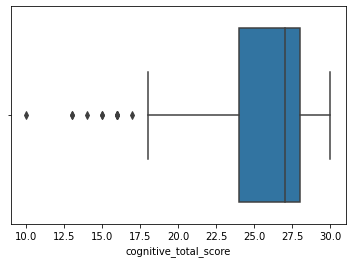

In [4864]:
sns.boxplot(clinical.cognitive_total_score)

/Users/shortie/opt/anaconda3/envs/data_analysis/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cognitive_total_score', ylabel='Density'>

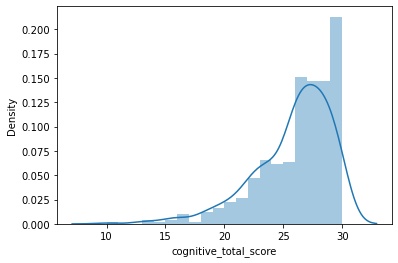

In [4865]:
sns.distplot(clinical.cognitive_total_score)

In [4866]:
#39 NaN
clinical['memory_complain'].value_counts(dropna=False)

No     399
Yes    102
NaN     39
Name: memory_complain, dtype: int64

In [4867]:
clinical['memory_complain'] = clinical['memory_complain'].map(yn_map)
clinical['memory_complain'].value_counts(dropna=False)

0.0    399
1.0    102
NaN     39
Name: memory_complain, dtype: int64

In [4868]:
#3 NaN
clinical['sleep'].value_counts(dropna=False)

No sleep problem            297
Occasional sleep problem    145
Permanent sleep problem      95
NaN                           3
Name: sleep, dtype: int64

In [4869]:
sleep_map = {'Permanent sleep problem': 2, 'Occasional sleep problem': 1, 'No sleep problem': 0}
clinical['sleep'] = clinical['sleep'].map(sleep_map)
clinical['sleep'].value_counts(dropna=False)

0.0    297
1.0    145
2.0     95
NaN      3
Name: sleep, dtype: int64

In [4870]:
clinical['mmse_total_score'].value_counts(dropna=False)

29    122
30    113
28    102
27     86
25     52
26     42
24     22
23      1
Name: mmse_total_score, dtype: int64

In [4871]:
#1 NaN
clinical['depression_total_score'].value_counts(dropna=False)

0.0     109
1.0      98
2.0      87
3.0      76
4.0      59
5.0      31
7.0      20
6.0      18
8.0      16
9.0       8
10.0      7
11.0      4
13.0      2
15.0      2
12.0      1
14.0      1
NaN       1
Name: depression_total_score, dtype: int64

In [4872]:
clinical['anxiety_perception'].value_counts(dropna=False)

2.0    38
0.0    31
1.0    30
3.0    29
5.0    28
       ..
7.3     1
9.4     1
7.9     1
2.1     1
6.5     1
Name: anxiety_perception, Length: 95, dtype: int64

In [4873]:
#1 NaN
clinical['living_alone'].value_counts(dropna=False)

No     375
Yes    164
NaN      1
Name: living_alone, dtype: int64

In [4874]:
clinical['living_alone'] = clinical['living_alone'].map(yn_map)
clinical['living_alone'].value_counts(dropna=False)

0.0    375
1.0    164
NaN      1
Name: living_alone, dtype: int64

In [4875]:
#1 NaN
clinical['leisure_out'].value_counts(dropna=False)

7.00     246
5.00      45
2.00      32
3.00      32
0.00      29
4.00      27
6.00      27
1.00      24
10.00     22
14.00     19
8.00       9
15.00      5
2.50       3
20.00      3
16.00      3
28.00      2
12.00      2
21.00      2
7.50       1
NaN        1
4.50       1
3.50       1
0.25       1
11.00      1
25.00      1
18.00      1
Name: leisure_out, dtype: int64

In [4876]:
#1 NaN
clinical['leisure_club'].value_counts(dropna=False)

Yes    345
No     194
NaN      1
Name: leisure_club, dtype: int64

In [4877]:
clinical['leisure_club'] = clinical['leisure_club'].map(yn_map)
clinical['leisure_club'].value_counts(dropna=False)

1.0    345
0.0    194
NaN      1
Name: leisure_club, dtype: int64

In [4878]:
#4x 999 1 NaN
clinical['social_visits'].value_counts(dropna=False)

7.00      154
2.00       87
3.00       77
1.00       61
5.00       41
0.00       33
4.00       32
6.00       27
8.00        5
999.00      4
2.50        3
0.25        3
10.00       2
9.00        2
0.50        2
4.50        1
2.25        1
NaN         1
3.50        1
20.00       1
14.00       1
30.00       1
Name: social_visits, dtype: int64

In [4879]:
#2x 999 2 NaN
clinical['social_calls'].value_counts(dropna=False)

7.0      187
2.0       37
5.0       33
10.0      30
20.0      30
3.0       23
15.0      22
14.0      19
0.0       19
1.0       18
6.0       16
4.0       16
25.0      13
70.0      11
30.0      11
21.0       9
8.0        8
12.0       7
35.0       6
28.0       5
40.0       3
9.0        3
999.0      2
50.0       2
17.5       2
NaN        2
2.5        1
36.0       1
24.0       1
17.0       1
18.0       1
100.0      1
Name: social_calls, dtype: int64

In [4880]:
#39x 999
clinical['social_phone'].value_counts(dropna=False)

60.0     44
999.0    39
30.0     33
70.0     32
210.0    31
         ..
910.0     1
95.0      1
525.0     1
168.0     1
900.0     1
Name: social_phone, Length: 65, dtype: int64

In [4881]:
#10x 999 1 NaN
clinical['social_skype'].value_counts(dropna=False)

0.0      480
30.0      10
999.0     10
60.0       9
10.0       8
20.0       4
120.0      3
15.0       3
2.0        2
180.0      2
70.0       2
105.0      2
50.0       1
NaN        1
400.0      1
90.0       1
80.0       1
Name: social_skype, dtype: int64

In [4882]:
#11x 999 2 NaN
clinical['social_text'].value_counts(dropna=False)

0.0      329
10.0      26
2.0       20
3.0       19
1.0       17
5.0       13
7.0       12
999.0     11
4.0       11
15.0      10
20.0      10
30.0       8
70.0       7
14.0       7
35.0       6
40.0       6
50.0       4
6.0        4
12.0       2
56.0       2
100.0      2
NaN        2
150.0      2
9.0        1
53.0       1
49.0       1
161.0      1
21.0       1
11.0       1
28.0       1
23.0       1
60.0       1
26.0       1
Name: social_text, dtype: int64

In [4883]:
#98 NaN
clinical['house_suitable_participant'].value_counts(dropna=False)

Yes    422
NaN     98
No      20
Name: house_suitable_participant, dtype: int64

In [4884]:
clinical['house_suitable_participant'] = clinical['house_suitable_participant'].map(yn_map)
clinical['house_suitable_participant'].value_counts(dropna=False)

1.0    422
NaN     98
0.0     20
Name: house_suitable_participant, dtype: int64

In [4885]:
#98 NaN
clinical['house_suitable_professional'].value_counts(dropna=False)

Yes    419
NaN     98
No      23
Name: house_suitable_professional, dtype: int64

In [4886]:
clinical['house_suitable_professional'] = clinical['house_suitable_professional'].map(yn_map)
clinical['house_suitable_professional'].value_counts(dropna=False)

1.0    419
NaN     98
0.0     23
Name: house_suitable_professional, dtype: int64

In [4887]:
#98 NaN
clinical['stairs_number'].value_counts(dropna=False)

0.0     206
NaN      98
2.0      27
3.0      24
6.0      19
5.0      18
1.0      18
4.0      15
12.0     13
14.0     12
10.0     11
20.0      9
15.0      9
18.0      7
7.0       7
16.0      5
17.0      5
13.0      4
19.0      4
8.0       4
23.0      3
9.0       3
25.0      3
34.0      2
32.0      2
30.0      2
39.0      2
52.0      2
37.0      1
29.0      1
11.0      1
40.0      1
24.0      1
42.0      1
Name: stairs_number, dtype: int64

In [4888]:
#1 NaN
clinical['health_rate'].value_counts(dropna=False)

4 - Good         282
3 - Medium       173
5 - Excellent     57
2 - Bad           24
1 - Very bad       3
NaN                1
Name: health_rate, dtype: int64

In [4889]:
hr_map = {'5 - Excellent': 5, '4 - Good': 4, '3 - Medium': 3, '2 - Bad': 2,
          '1 - Very bad': 1}
clinical['health_rate'] = clinical['health_rate'].map(hr_map)
clinical['health_rate'].value_counts(dropna=False)

4.0    282
3.0    173
5.0     57
2.0     24
1.0      3
NaN      1
Name: health_rate, dtype: int64

In [4890]:
#1 NaN
clinical['health_rate_comparison'].value_counts(dropna=False)

3 - About the same     329
2 - A little worse     123
4 - A little better     58
1 - A lot worse         15
5 - A lot better        14
NaN                      1
Name: health_rate_comparison, dtype: int64

In [4891]:
hrc_map = {'5 - A lot better': 5, '4 - A little better': 4, '3 - About the same': 3,
           '2 - A little worse': 2, '1 - A lot worse': 1}
clinical['health_rate_comparison'] = clinical['health_rate_comparison'].map(hrc_map)
clinical['health_rate_comparison'].value_counts(dropna=False)

3.0    329
2.0    123
4.0     58
1.0     15
5.0     14
NaN      1
Name: health_rate_comparison, dtype: int64

In [4892]:
clinical['pain_perception'].value_counts(dropna=False)

1.00    66
2.00    44
0.00    40
3.00    38
5.00    31
        ..
6.45     1
7.10     1
3.60     1
7.70     1
8.70     1
Name: pain_perception, Length: 91, dtype: int64

In [4893]:
#2 NaN
clinical['activity_regular'].value_counts(dropna=False)

> 2 h and < 5 h per week    175
> 5 h per week              169
< 2 h per week              148
No                           46
NaN                           2
Name: activity_regular, dtype: int64

In [4894]:
# nominal categories converted to numerical
ar_map = {'No': 0, '< 2 h per week': 1, '> 2 h and < 5 h per week': 2, '> 5 h per week': 3,}
clinical['activity_regular'] = clinical['activity_regular'].map(ar_map)
clinical['activity_regular'].value_counts(dropna=False)

2.0    175
3.0    169
1.0    148
0.0     46
NaN      2
Name: activity_regular, dtype: int64

In [4895]:
#1 NaN
clinical['smoking'].value_counts(dropna=False)

Never smoked                               310
Past smoker (stopped at least 6 months)    178
Current smoker                              51
NaN                                          1
Name: smoking, dtype: int64

In [4896]:
# nominal categories converted to numerical
smoke_map = {'Never smoked': 0, 'Past smoker (stopped at least 6 months)': 1, 'Current smoker': 2}
clinical['smoking'] = clinical['smoking'].map(smoke_map)
clinical['smoking'].value_counts(dropna=False)

0.0    310
1.0    178
2.0     51
NaN      1
Name: smoking, dtype: int64

In [4897]:
#2x 999
clinical['alcohol_units'].value_counts(dropna=False)

0.000      245
1.000       68
3.000       35
2.000       26
21.000      18
1.500       17
14.000      12
4.000       11
10.500      11
7.000       10
6.000       10
4.500        9
9.000        4
2.500        4
0.750        4
28.000       3
12.500       3
0.500        3
22.000       3
11.500       3
5.000        3
23.000       2
7.500        2
12.000       2
999.000      2
8.000        2
42.000       2
5.500        2
5.250        2
18.500       2
24.000       1
35.000       1
3.250        1
16.500       1
24.500       1
10.000       1
13.500       1
2.250        1
22.500       1
63.000       1
1.250        1
18.000       1
30.000       1
0.375        1
9.500        1
20.000       1
19.000       1
2.750        1
33.250       1
17.250       1
Name: alcohol_units, dtype: int64

In [4898]:
clinical['katz_index'].value_counts(dropna=False)

6.0    428
5.5     86
5.0     10
2.5      4
4.5      4
3.0      3
3.5      2
4.0      2
2.0      1
Name: katz_index, dtype: int64

In [4899]:
#1 NaN
clinical['iadl_grade'].value_counts(dropna=False)

31.0    255
28.0     33
30.0     31
19.0     26
27.0     24
23.0     24
29.0     23
26.0     19
22.0     17
25.0     12
20.0     11
15.0     11
24.0     10
11.0      9
13.0      7
16.0      6
14.0      4
12.0      4
17.0      4
21.0      3
18.0      2
10.0      2
9.0       1
8.0       1
NaN       1
Name: iadl_grade, dtype: int64

In [4900]:
clinical['comorbidities_count'].value_counts(dropna=False)

3     84
2     81
4     74
1     58
6     55
5     48
7     29
8     25
0     24
9     20
10    11
11    10
12     8
14     5
13     5
17     1
16     1
15     1
Name: comorbidities_count, dtype: int64

In [4901]:
clinical['comorbidities_significant_count'].value_counts(dropna=False)

0    427
1     80
2     18
3      8
4      3
5      2
7      2
Name: comorbidities_significant_count, dtype: int64

In [4902]:
clinical['medication_count'].value_counts(dropna=False)

3     94
1     94
2     70
4     48
5     44
6     39
0     37
7     31
8     27
9     20
10    17
13     5
12     4
11     3
17     2
14     2
15     2
16     1
Name: medication_count, dtype: int64

In [4903]:
# drop any rows that are missing all values and print the NaN values per attribute
clinical.dropna(how = 'all')
clinical.isna().sum()

part_id                              0
fried                                0
gender                               0
age                                  0
hospitalization_one_year             0
hospitalization_three_years          0
ortho_hypotension                    0
vision                               0
audition                             0
weight_loss                          2
exhaustion_score                     0
raise_chair_time                     1
balance_single                      50
gait_get_up                          2
gait_speed_4m                        0
gait_optional_binary                 0
gait_speed_slower                    4
grip_strength_abnormal               0
low_physical_activity                0
falls_one_year                       0
fractures_three_years                0
bmi_score                            2
bmi_body_fat                       133
waist                                3
lean_body_mass                     133
screening_score          

In [4904]:
clinical[clinical['weight_loss'].isna()]

,part_id,fried,gender,age,hospitalization_one_year,hospitalization_three_years,ortho_hypotension,vision,audition,weight_loss,...,health_rate_comparison,pain_perception,activity_regular,smoking,alcohol_units,katz_index,iadl_grade,comorbidities_count,comorbidities_significant_count,medication_count
229,2052,1,1,81,0,0,0,2,2,NaN,...,3.0,8.0,1.0,0.0,0.0,6.0,31.0,0,0,1
414,3063,0,1,84,1,1,1,2,2,NaN,...,3.0,0.0,1.0,0.0,0.0,5.5,29.0,3,0,2


In [4905]:
# Drop columns with 20% or more of NaN values
clinical = clinical.drop(['bmi_body_fat', 'lean_body_mass',
                         'house_suitable_participant',
                         'house_suitable_professional', 'stairs_number'], axis=1)

In [4906]:
# print the NaN values per attribute
clinical.isna().sum()

part_id                             0
fried                               0
gender                              0
age                                 0
hospitalization_one_year            0
hospitalization_three_years         0
ortho_hypotension                   0
vision                              0
audition                            0
weight_loss                         2
exhaustion_score                    0
raise_chair_time                    1
balance_single                     50
gait_get_up                         2
gait_speed_4m                       0
gait_optional_binary                0
gait_speed_slower                   4
grip_strength_abnormal              0
low_physical_activity               0
falls_one_year                      0
fractures_three_years               0
bmi_score                           2
waist                               3
screening_score                     0
cognitive_total_score              56
memory_complain                    39
sleep       

In [4907]:
clinical['weight_loss'] = clinical['weight_loss'].fillna(clinical['weight_loss'].mode()[0])
clinical['balance_single'] = clinical['balance_single'].fillna(clinical['balance_single'].mode()[0])
clinical['gait_speed_slower'] = clinical['gait_speed_slower'].fillna(clinical['gait_speed_slower'].mode()[0])
clinical['memory_complain'] = clinical['memory_complain'].fillna(clinical['memory_complain'].mode()[0])
clinical['sleep'] = clinical['sleep'].fillna(clinical['sleep'].mode()[0])
clinical['living_alone'] = clinical['living_alone'].fillna(clinical['living_alone'].mode()[0])
clinical['leisure_club'] = clinical['leisure_club'].fillna(clinical['leisure_club'].mode()[0])
clinical['health_rate_comparison'] = clinical['health_rate_comparison'].fillna(clinical['health_rate_comparison'].mode()[0])
clinical['activity_regular'] = clinical['activity_regular'].fillna(clinical['activity_regular'].mode()[0])
clinical['smoking'] = clinical['smoking'].fillna(clinical['smoking'].mode()[0])

In [4908]:
clinical = clinical.replace(999, np.nan)

In [4909]:
#Replace missing values with the
clinical = clinical.fillna(clinical.mean())
clinical.isna().sum()

part_id                            0
fried                              0
gender                             0
age                                0
hospitalization_one_year           0
hospitalization_three_years        0
ortho_hypotension                  0
vision                             0
audition                           0
weight_loss                        0
exhaustion_score                   0
raise_chair_time                   0
balance_single                     0
gait_get_up                        0
gait_speed_4m                      0
gait_optional_binary               0
gait_speed_slower                  0
grip_strength_abnormal             0
low_physical_activity              0
falls_one_year                     0
fractures_three_years              0
bmi_score                          0
waist                              0
screening_score                    0
cognitive_total_score              0
memory_complain                    0
sleep                              0
m

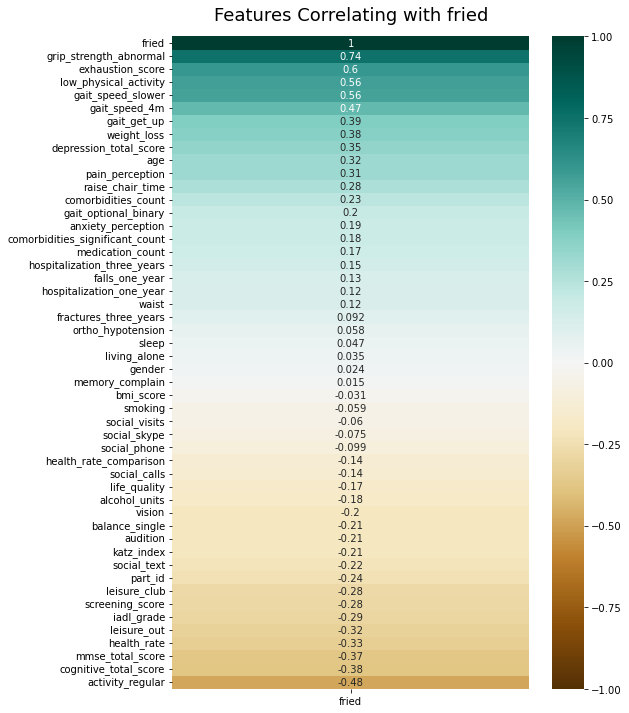

In [4910]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(clinical.corr()[['fried']].sort_values(by='fried', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with fried', fontdict={'fontsize':18}, pad=16);